In [3]:
!pip install umap

In [4]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

In [6]:
os.listdir('./brain_tumor_dataset')

['no', 'yes']

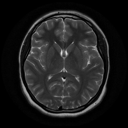

In [7]:
br_img1 =Image.open('./brain_tumor_dataset/no/1 no.jpeg').resize((128,128))
br_img1

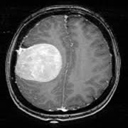

In [8]:
br_img2 =Image.open('./brain_tumor_dataset/yes/Y1.jpg').resize((128,128))
br_img2

In [9]:
yes_tumor=os.listdir('./brain_tumor_dataset/yes')
no_tumor=os.listdir('./brain_tumor_dataset/no')

In [10]:
inp_dat=np.concatenate([yes_tumor,no_tumor])
len(inp_dat)==len(yes_tumor)+len(no_tumor)

True

In [11]:
label_x=np.full(len(yes_tumor),1)
label_y=np.full(len(no_tumor),0)
label_Dat=np.concatenate([label_x,label_y])
len(label_Dat)==len(label_x)+len(label_y)

True

In [12]:
len(label_Dat)==len(inp_dat)

True

In [13]:
label_Dat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
inp_dat

array(['Y1.jpg', 'Y10.jpg', 'Y100.JPG', 'Y101.jpg', 'Y102.jpg',
       'Y103.jpg', 'Y104.jpg', 'Y105.jpg', 'Y106.jpg', 'Y107.jpg',
       'Y108.jpg', 'Y109.JPG', 'Y11.jpg', 'Y111.JPG', 'Y112.JPG',
       'Y113.JPG', 'Y114.JPG', 'Y115.JPG', 'Y116.JPG', 'Y117.JPG',
       'Y12.jpg', 'Y120.JPG', 'Y13.jpg', 'Y14.jpg', 'Y146.JPG',
       'Y147.JPG', 'Y148.JPG', 'Y15.jpg', 'Y153.jpg', 'Y154.jpg',
       'Y155.JPG', 'Y156.JPG', 'Y157.JPG', 'Y158.JPG', 'Y159.JPG',
       'Y16.JPG', 'Y160.JPG', 'Y161.JPG', 'Y162.jpg', 'Y163.JPG',
       'Y164.JPG', 'Y165.JPG', 'Y166.JPG', 'Y167.JPG', 'Y168.jpg',
       'Y169.jpg', 'Y17.jpg', 'Y170.JPG', 'Y18.JPG', 'Y180.jpg',
       'Y181.jpg', 'Y182.JPG', 'Y183.jpg', 'Y184.JPG', 'Y185.jpg',
       'Y186.jpg', 'Y187.jpg', 'Y188.jpg', 'Y19.JPG', 'Y192.JPG',
       'Y193.JPG', 'Y194.jpg', 'Y195.JPG', 'Y2.jpg', 'Y20.jpg', 'Y21.jpg',
       'Y22.jpg', 'Y23.JPG', 'Y24.jpg', 'Y242.JPG', 'Y243.JPG',
       'Y244.JPG', 'Y245.jpg', 'Y246.JPG', 'Y247.JPG', 'Y248.JPG',
  

In [20]:
y_val=os.listdir('./brain_tumor_dataset/yes')
n_val=os.listdir('./brain_tumor_dataset/no')

In [21]:
dat_x =[]
for f in y_val:
    
    ig1 = cv2.imread('./brain_tumor_dataset/yes/'+f)
    mfce = cv2.resize(ig1, (32, 32) )
    (b, g, r)=cv2.split(mfce) 
    ig1=cv2.merge([r,g,b])
    dat_x.append(ig1)

In [22]:

for f in n_val:
    
    ig1 = cv2.imread('./brain_tumor_dataset/no/'+f)
    mfce = cv2.resize(ig1, (32, 32) )
    (b, g, r)=cv2.split(mfce) 
    ig1=cv2.merge([r,g,b])
    dat_x.append(ig1)

In [14]:
len(dat_x)==len(inp_dat)==len(label_Dat)

True

In [23]:
featx = np.squeeze(dat_x)


In [24]:
featx.shape


(253, 32, 32, 3)

In [25]:
# normalize data
featx= featx.astype('float32')
featx/= 255

In [26]:
label_Dat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
(xtrain, ytrain), (xtest, ytest) = (featx[:190],label_Dat[:190]) , (featx[190:] , label_Dat[190:])
(xvalid , yvalid) = (xtest[:63], ytest[:63])


In [28]:
Cnn_model1 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
Cnn_model1.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
Cnn_model1.add(tf.keras.layers.MaxPooling2D(pool_size=2))
Cnn_model1.add(tf.keras.layers.Dropout(0.45))

Cnn_model1.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
Cnn_model1.add(tf.keras.layers.MaxPooling2D(pool_size=2))
Cnn_model1.add(tf.keras.layers.Dropout(0.25))

Cnn_model1.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
Cnn_model1.add(tf.keras.layers.MaxPooling2D(pool_size=2))
Cnn_model1.add(tf.keras.layers.Dropout(0.25))

Cnn_model1.add(tf.keras.layers.Flatten())

Cnn_model1.add(tf.keras.layers.Dense(512, activation='relu'))
Cnn_model1.add(tf.keras.layers.Dropout(0.15))


Cnn_model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Take a look at the model summary
Cnn_model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        3904      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        20752     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 36)          4

In [29]:
Cnn_model1.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [31]:
Cnn_model1.fit(xtrain,
         ytrain,
         batch_size=128,
         epochs=150,
         validation_data=(xvalid, yvalid),)

Epoch 1/150
2/2 [==============================] - 1s 348ms/step - loss: 0.6742 - acc: 0.4947 - val_loss: 1.1064 - val_acc: 0.0000e+00
Epoch 2/150
2/2 [==============================] - 0s 143ms/step - loss: 0.4555 - acc: 0.8158 - val_loss: 0.9007 - val_acc: 0.0000e+00
Epoch 3/150
2/2 [==============================] - 0s 108ms/step - loss: 0.4829 - acc: 0.8158 - val_loss: 1.0013 - val_acc: 0.0000e+00
Epoch 4/150
2/2 [==============================] - 0s 109ms/step - loss: 0.4657 - acc: 0.8158 - val_loss: 1.0245 - val_acc: 0.0000e+00
Epoch 5/150
2/2 [==============================] - 0s 108ms/step - loss: 0.4537 - acc: 0.8158 - val_loss: 0.9989 - val_acc: 0.0000e+00
Epoch 6/150
2/2 [==============================] - 0s 120ms/step - loss: 0.4552 - acc: 0.8158 - val_loss: 0.9475 - val_acc: 0.0000e+00
Epoch 7/150
2/2 [==============================] - 0s 121ms/step - loss: 0.4518 - acc: 0.8158 - val_loss: 0.9276 - val_acc: 0.0000e+00
Epoch 8/150
2/2 [==============================] - 0s 1

2/2 [==============================] - 0s 94ms/step - loss: 0.1485 - acc: 0.9526 - val_loss: 1.1233 - val_acc: 0.7460
Epoch 64/150
2/2 [==============================] - 0s 92ms/step - loss: 0.1129 - acc: 0.9579 - val_loss: 1.1402 - val_acc: 0.7619
Epoch 65/150
2/2 [==============================] - 0s 92ms/step - loss: 0.1365 - acc: 0.9474 - val_loss: 1.0970 - val_acc: 0.7619
Epoch 66/150
2/2 [==============================] - 0s 90ms/step - loss: 0.1086 - acc: 0.9579 - val_loss: 1.5850 - val_acc: 0.6667
Epoch 67/150
2/2 [==============================] - 0s 89ms/step - loss: 0.1336 - acc: 0.9526 - val_loss: 1.0891 - val_acc: 0.7619
Epoch 68/150
2/2 [==============================] - 0s 91ms/step - loss: 0.1335 - acc: 0.9632 - val_loss: 1.7966 - val_acc: 0.5397
Epoch 69/150
2/2 [==============================] - 0s 88ms/step - loss: 0.1909 - acc: 0.9211 - val_loss: 1.0833 - val_acc: 0.7778
Epoch 70/150
2/2 [==============================] - 0s 91ms/step - loss: 0.1471 - acc: 0.9474 - 

2/2 [==============================] - 0s 90ms/step - loss: 0.0332 - acc: 0.9895 - val_loss: 1.7727 - val_acc: 0.7460
Epoch 126/150
2/2 [==============================] - 0s 91ms/step - loss: 0.0319 - acc: 0.9842 - val_loss: 2.2818 - val_acc: 0.7143
Epoch 127/150
2/2 [==============================] - 0s 91ms/step - loss: 0.0658 - acc: 0.9842 - val_loss: 1.8788 - val_acc: 0.7302
Epoch 128/150
2/2 [==============================] - 0s 92ms/step - loss: 0.0192 - acc: 0.9895 - val_loss: 1.5576 - val_acc: 0.7619
Epoch 129/150
2/2 [==============================] - 0s 96ms/step - loss: 0.0219 - acc: 1.0000 - val_loss: 1.5700 - val_acc: 0.7937
Epoch 130/150
2/2 [==============================] - 0s 95ms/step - loss: 0.0238 - acc: 0.9947 - val_loss: 1.9844 - val_acc: 0.7302
Epoch 131/150
2/2 [==============================] - 0s 93ms/step - loss: 0.0345 - acc: 0.9842 - val_loss: 2.2809 - val_acc: 0.7302
Epoch 132/150
2/2 [==============================] - 0s 89ms/step - loss: 0.0110 - acc: 1.

In [35]:
# Evaluate the model on test set
testscore = Cnn_model1.evaluate(xtest, ytest, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', testscore[1])


 Test accuracy: 0.7777777910232544


In [36]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]

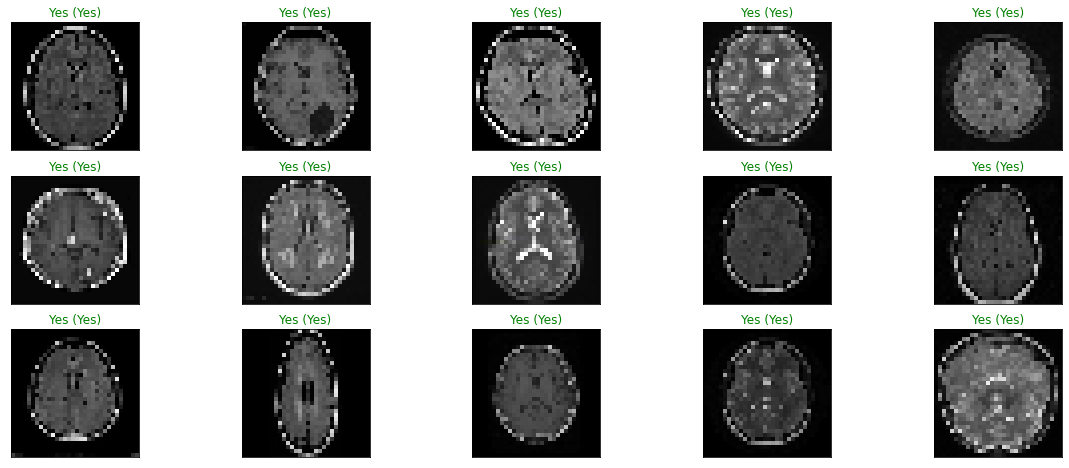

In [38]:
yhat = Cnn_model1.predict(xtest)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(xtest.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(xtest[index]))
    predictindex = np.argmax(yhat[index])
    trueindex = np.argmax(ytest[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predictindex], 
                                  labels[trueindex]),
                                  color=("green" if predictindex == trueindex else "red"))
plt.show()